# Main analysis of data
## This notebook is intended to be a structured results collection from tools developed locally
### more infoo



---


## Statistics
### Envelope enhancer
#### In this section, FFT is performed and analyzed on regions of interest for each record.
Regions of interest is determined by the envelope of the signal. 

Pipeline:
1. Detrending
2. Savgol filter
3. Segmentation (Envelope enhancer)
4. FFT

Statistical values considered:
- The mean, variance and std. error of every freqcuency corresponding to a max value in its window.

### Imports

In [1]:
from ski_analys import DataRecord, simple_segmentation, envelope_enhancer, savgol_helper, enhanced_fft
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np

def load_data(filter_params, file):
    data = DataRecord(file)
    for filter in filter_params:
        if filter not in data.metadata:
            return None     
        if data.metadata[filter] not in filter_params[filter]:
            return None
    return data

In [5]:
csv_data_path = pathlib.Path("data/")
result_path = pathlib.Path("testing/")
for file in csv_data_path.glob("*.csv"):
    enhanced_fft(file=file, save_path="testing/", enhance_method=envelope_enhancer, filter=None, window_length=20, polyorder=3, axis=0, n_out=50, width=(1, None), prominence =(None, 20), detrending=True)
print("Done!")

Done!


In [ ]:
result_path = pathlib.Path("testing/")
data = [DataRecord(file) for file in result_path.iterdir() if file.is_file()]
x_data = [x for x in data if x.metadata['coord'] == 'x']
y_data = [x for x in data if x.metadata['coord'] == 'y']
z_data = [x for x in data if x.metadata['coord'] == 'z']

In [ ]:
highest_freqs = []
for obj in x_data:
    freq, mag = zip(*obj.data[5:len(obj.data)//2])
    
    
    index = np.argmax(mag)
    highest_freqs.append(freq[index])

np.var(highest_freqs), np.mean(highest_freqs), np.std(highest_freqs)
highest_freqs

In [ ]:
freq, mag = zip(*x_data[0].data[:len(x_data[0].data)//2])
plt.xlim(0, 20)
plt.plot(freq, mag)
x_data[0].metadata

In [ ]:
sample = [x for x in data if x.metadata['record'] == "5" and x.metadata['coord'] == 'z' and x.metadata['accel'] == '2']
n = len(sample[0].data)
x,y = zip(*sample[8].data[0:n//2])

plt.xlim(0, 50)
plt.plot(x,y)
np.argmax(y)
x[np.argmax(y)]

### Analyze Hannas data
#### Filter based on:
- Records in range 1-9 
- Accelerometer Both

In [6]:
# filter
filter = {
    "record": ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], # skip record 0, it was a test run
    "accel": ["1","2"]
}

result_path = pathlib.Path("testing/")
records = {
    "x": [],
    "y": [],
    "z": []
}

# itterate through results files, filter and load
for file in result_path.iterdir():
    if file.is_file():
        data = load_data(filter, file)
        if data:
            records[data.coord].append(data)

x_freq_peaks = [record.freq_peak for record in records["x"]]
y_freq_peaks = [record.freq_peak for record in records["y"]]
z_freq_peaks = [record.freq_peak for record in records["z"]]

# results
np.mean(x_freq_peaks), np.mean(y_freq_peaks), np.mean(z_freq_peaks)


(np.float64(9.982982446351455),
 np.float64(37.336315442619856),
 np.float64(15.210562745521013))

1240
1183
1244
1320
1515


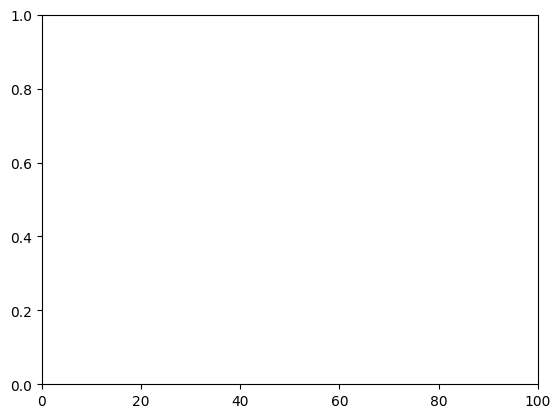

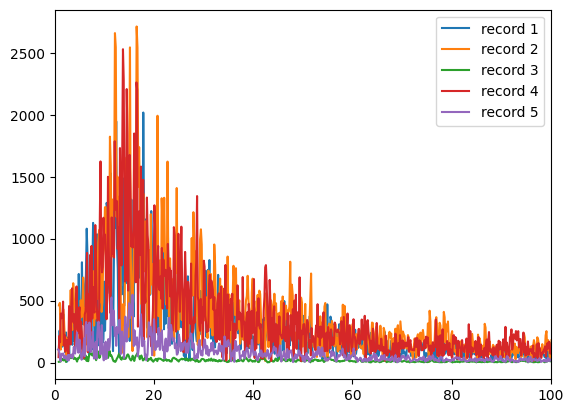

In [7]:
plt.xlim(0,100)
plt.figure()
for x in [1,2,3,4,5]:
    plt.plot(records["z"][x].freqs[5:], records["z"][x].mags[5:], label=f"record {x}")
    print(len(records["z"][x].mags[5:]))
    
plt.legend()
plt.xlim(0,100)
plt.show()


#### Hannas data by accel

In [8]:

x_freq_peaks_1 = [record.freq_peak for record in records["x"] if record.accel == "1"]
y_freq_peaks_1 = [record.freq_peak for record in records["y"] if record.accel == "1"]
z_freq_peaks_1 = [record.freq_peak for record in records["z"] if record.accel == "1"]

x_freq_peaks_2 = [record.freq_peak for record in records["x"] if record.accel == "2"]
y_freq_peaks_2 = [record.freq_peak for record in records["y"] if record.accel == "2"]
z_freq_peaks_2 = [record.freq_peak for record in records["z"] if record.accel == "2"]

# results

print(f"Accel 1:\n"
      f"mean x: {np.mean(x_freq_peaks_1)}, mean y: {np.mean(y_freq_peaks_1)}, mean z: {np.mean(z_freq_peaks_1)}\n"
      f"std x: {np.std(x_freq_peaks_1)}, std y: {np.std(y_freq_peaks_1)}, std z: {np.std(z_freq_peaks_1)}\n"
      f"var x: {np.var(x_freq_peaks_1)}, var y: {np.var(y_freq_peaks_1)}, var z: {np.var(z_freq_peaks_1)}\n")

print(f"Accel 2:\n"
      f"mean x: {np.mean(x_freq_peaks_2)}, mean y: {np.mean(y_freq_peaks_2)}, mean z: {np.mean(z_freq_peaks_2)}\n"
      f"std x: {np.std(x_freq_peaks_2)}, std y: {np.std(y_freq_peaks_2)}, std z: {np.std(z_freq_peaks_2)}\n"
      f"var x: {np.var(x_freq_peaks_2)}, var y: {np.var(y_freq_peaks_2)}, var z: {np.var(z_freq_peaks_2)}\n")



Accel 1:
mean x: 6.2821374999974875, mean y: 10.989230457022167, mean z: 15.502498602817315
std x: 6.931066113164264, std y: 28.406066546254014, std z: 11.059638066384052
var x: 48.039677465053984, var y: 806.9046166302114, var z: 122.31559415941118

Accel 2:
mean x: 13.683827392705425, mean y: 63.68340042821754, mean z: 14.918626888224708
std x: 2.434446487498796, std y: 5.707899179181829, std z: 1.8795344789150035
var x: 5.926529700495224, var y: 32.5801130397046, var z: 3.532649857430294



### Eriks data
filter based on:
- Records in range 11-19
- Accelerometer: Both

In [9]:
# filter
filter = {
    "record": ["11", "12", "13", "14", "15", "16", "17", "18", "19"], # skip record 0, it was a test run
    "accel": ["1","2"]
}

result_path = pathlib.Path("testing/")
records = {
    "x": [],
    "y": [],
    "z": []
}

for file in result_path.iterdir():
    if file.is_file():
        data = load_data(filter, file)
        if data:
            records[data.coord].append(data)

x_freq_peaks = [record.freq_peak for record in records["x"]]
y_freq_peaks = [record.freq_peak for record in records["y"]]
z_freq_peaks = [record.freq_peak for record in records["z"]]

np.mean(x_freq_peaks), np.mean(y_freq_peaks), np.mean(z_freq_peaks)

(np.float64(9.600970845168252),
 np.float64(31.056221985487404),
 np.float64(12.971537827513107))

In [10]:

x_freq_peaks_1 = [record.freq_peak for record in records["x"] if record.accel == "1"]
y_freq_peaks_1 = [record.freq_peak for record in records["y"] if record.accel == "1"]
z_freq_peaks_1 = [record.freq_peak for record in records["z"] if record.accel == "1"]

x_freq_peaks_2 = [record.freq_peak for record in records["x"] if record.accel == "2"]
y_freq_peaks_2 = [record.freq_peak for record in records["y"] if record.accel == "2"]
z_freq_peaks_2 = [record.freq_peak for record in records["z"] if record.accel == "2"]

# results

print(f"Accel 1:\n"
      f"mean x: {np.mean(x_freq_peaks_1)}, mean y: {np.mean(y_freq_peaks_1)}, mean z: {np.mean(z_freq_peaks_1)}\n"
      f"std x: {np.std(x_freq_peaks_1)}, std y: {np.std(y_freq_peaks_1)}, std z: {np.std(z_freq_peaks_1)}\n"
      f"var x: {np.var(x_freq_peaks_1)}, var y: {np.var(y_freq_peaks_1)}, var z: {np.var(z_freq_peaks_1)}\n")

print(f"Accel 2:\n"
      f"mean: x: {np.mean(x_freq_peaks_2)}, y: {np.mean(y_freq_peaks_2)}, z: {np.mean(z_freq_peaks_2)}\n"
      f"std: x: {np.std(x_freq_peaks_2)}, y: {np.std(y_freq_peaks_2)}, z: {np.std(z_freq_peaks_2)}\n"
      f"var: x: {np.var(x_freq_peaks_2)}, y: {np.var(y_freq_peaks_2)}, z: {np.var(z_freq_peaks_2)}\n")



Accel 1:
mean x: 4.918168018663962, mean y: 3.024054206307219, mean z: 10.365672993681311
std x: 4.966031518567738, std y: 1.9416035402749936, std z: 6.883465214775275
var x: 24.661469043408196, var y: 3.7698243076083884, var z: 47.38209336302122

Accel 2:
mean: x: 14.28377367167254, y: 59.08838976466758, z: 15.577402661344907
std: x: 3.4675633266858976, y: 17.463077877898197, z: 2.4553570569766463
var: x: 12.02399542457697, y: 304.9590889695374, z: 6.028778277245018

